<a href="https://colab.research.google.com/github/luisangel181/tesis_ingcivil/blob/main/Resistencia_a_la_Compresion_de_Bloques_de_Concreto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tesis: “Adición de poliestireno expandido y fibras de PET recicladas para mejorar las propiedades del bloque de concreto, Cajamarca 2024”

Analisis estadistico ANOVA de los resultados de resistencia a la compresion de bloques de concreto

Elaborado por: luis Angel Vásquez Chávez

In [1]:
# librerias a importar
import pandas as pd
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Importar archivo de resultados de resistencia a la compresion - cargar hoja "compresion"
df = pd.read_excel("/content/drive/MyDrive/RESULTADOS_TESIS CIVIL/Resultados_compresion.xlsx", sheet_name='Compresion')

# Visualizar datos
df.head()

,Dosificación,Bloque 1,Bloque 2,Bloque 3,Bloque 4,Bloque 5,Bloque 6,Edad de curado (días)
0,Patrón,43.701923,43.170788,37.758700,38.328755,32.486264,32.543681,7
1,5% PE y 0.5% PET,29.652825,26.691627,36.553211,33.278875,26.943499,33.601089,7
2,10% PE y 0.5% PET,25.914210,24.912281,28.877643,25.942400,26.428250,29.313990,7
3,15% PE y 0.5% PET,26.299708,24.077134,25.121398,20.987066,21.549807,22.173814,7
4,Patrón,46.875000,52.518315,53.405945,54.741300,48.499726,46.792582,14


Pruebas de Normalidad

Se Aplica prueba de Shapiro-Wilk para evaluar si los datos siguen uan distribucion de probabilidad normal. Se emplea en muestras pequeñas (<50 datos)

H0: Los datos siguen una distribución normal.

H1: Los datos no siguen una distribución normal.

Si p > 0.05, se acepta H₀ → Los datos son normales (Aplicar ANOVA clásico).

Si p < 0.05, se rechaza H₀ → Los datos no son normales (Aplicar ANOVA no paramétrico).


In [6]:
# Función para aplicar Shapiro-Wilk y obtener resultados

def aplicar_shapiro(data, edad):
    resultados = []
    dosificaciones = ['Patrón', '5% PE y 0.5% PET', '10% PE y 0.5% PET', '15% PE y 0.5% PET']
    for dosificacion in dosificaciones:
        valores = data[(data['Edad de curado (días)'] == edad) & (data['Dosificación'] == dosificacion)].iloc[:, 1:7].values.flatten()
        stat, p = shapiro(valores)
        decision = 'Acepta H₀ (Distribución normal)' if p > 0.05 else 'Rechaza H₀ (No normal)'
        resultados.append([dosificacion, round(stat, 4), round(p, 4), decision])

    # Imprimir tabla
    print(f"\nPrueba de Shapiro-Wilk para {edad} días de curado")
    print("=" * 50)
    print("{:<25} {:<10} {:<10} {:<25}".format("Dosificación", "Estadístico", "Valor p", "Resultado"))
    print("-" * 50)
    for row in resultados:
        print("{:<25} {:<10} {:<10} {:<25}".format(*row))

# Aplicar para cada edad
for edad in [7, 14, 21, 28]:
    aplicar_shapiro(df, edad)


Prueba de Shapiro-Wilk para 7 días de curado
Dosificación              Estadístico Valor p    Resultado                
--------------------------------------------------
Patrón                    0.8776     0.2584     Acepta H₀ (Distribución normal)
5% PE y 0.5% PET          0.9147     0.4677     Acepta H₀ (Distribución normal)
10% PE y 0.5% PET         0.8687     0.2212     Acepta H₀ (Distribución normal)
15% PE y 0.5% PET         0.9319     0.5947     Acepta H₀ (Distribución normal)

Prueba de Shapiro-Wilk para 14 días de curado
Dosificación              Estadístico Valor p    Resultado                
--------------------------------------------------
Patrón                    0.8678     0.2175     Acepta H₀ (Distribución normal)
5% PE y 0.5% PET          0.922      0.5196     Acepta H₀ (Distribución normal)
10% PE y 0.5% PET         0.8312     0.1101     Acepta H₀ (Distribución normal)
15% PE y 0.5% PET         0.8281     0.1035     Acepta H₀ (Distribución normal)

Prueba de Shap

In [7]:
# Función para aplicar la prueba de Levene
def aplicar_levene(data, edad):
    dosificaciones = ['Patrón', '5% PE y 0.5% PET', '10% PE y 0.5% PET', '15% PE y 0.5% PET']
    valores = [data[(data['Edad de curado (días)'] == edad) & (data['Dosificación'] == dos)].iloc[:, 1:7].values.flatten() for dos in dosificaciones]
    stat, p = levene(*valores, center='mean') #mean, median, trimmed , default es "median", Se ajusta distribucion normal == mean
    decision = 'Acepta H₀ (Varianzas homogéneas)' if p > 0.05 else 'Rechaza H₀ (Varianzas no homogéneas)'

    # Imprimir resultado
    print(f"\nPrueba de Levene para {edad} días de curado")
    print("=" * 50)
    print("Estadístico: {:.4f}  |  Valor p: {:.4f}  |  Resultado: {}".format(stat, p, decision))

# Aplicar para cada edad
for edad in [7, 14, 21, 28]:
    aplicar_levene(df, edad)


Prueba de Levene para 7 días de curado
Estadístico: 2.8172  |  Valor p: 0.0653  |  Resultado: Acepta H₀ (Varianzas homogéneas)

Prueba de Levene para 14 días de curado
Estadístico: 6.5714  |  Valor p: 0.0029  |  Resultado: Rechaza H₀ (Varianzas no homogéneas)

Prueba de Levene para 21 días de curado
Estadístico: 3.3069  |  Valor p: 0.0412  |  Resultado: Rechaza H₀ (Varianzas no homogéneas)

Prueba de Levene para 28 días de curado
Estadístico: 7.8394  |  Valor p: 0.0012  |  Resultado: Rechaza H₀ (Varianzas no homogéneas)


Aplicando prueba ANOVA

Hipotesis nula (H0): "La adición de poliestireno expandido (PE) y fibras de PET no influye significativamente en la resistencia a la compresión del bloque de concreto."

Hipotesis alternativa (H1): "La adición de poliestireno expandido (PE) y fibras de PET influye significativamente en la resistencia a la compresión del bloque de concreto."

In [8]:
# Analisis de bloques a los 7 días

# Define que funcion ANOVA aplicar segun la homogeneidad

def aplicar_anova(data, edad, homogeneidad):
    modelo = ols('Resistencia ~ C(Dosificación)', data=data[data['Edad de curado (días)'] == edad]).fit()
    if homogeneidad:
        anova = sm.stats.anova_lm(modelo, typ=2)  # ANOVA clásico
    else:
        anova = sm.stats.anova_lm(modelo, typ=2, robust='hc3')  # ANOVA de Welch
    return anova

# Reestructurar el DataFrame para incluir los valores individuales por bloque
df_long = df.melt(id_vars=['Edad de curado (días)', 'Dosificación'],
                   value_vars=['Bloque 1', 'Bloque 2', 'Bloque 3', 'Bloque 4', 'Bloque 5', 'Bloque 6'],
                   var_name='Bloque', value_name='Resistencia')

# Aplicar ANOVA para compresión (usar ANOVA clásico porque Levene lo aceptó)
homogeneo = True
tipo_anova = 'Clasico' if homogeneo else 'de Welch'
anova_7_dias = aplicar_anova(df_long, 7, homogeneidad=homogeneo)

# Extraer valores clave del ANOVA
p_valor = anova_7_dias.iloc[0]["PR(>F)"]
F_valor = anova_7_dias.iloc[0]["F"]

print(f"\n ANOVA {tipo_anova}:")
print("=" * 50)

if p_valor<0.05:
  print("Se rechaza la hipótesis nula, lo que indica que existen diferencias significativas en la resistencia a la compresión entre las diferentes dosificaciones (Patrón, 5%, 10% y 15%) a los 7 días de curado.")
  print("El valor p es:", p_valor)
  print("El estadístico F es:", F_valor)
  print("Aplicar análisis post-hoc (Tukey) para identificar las diferencias significativas entre las dosificaciones.")
else:
  print("No se rechaza la hipótesis nula), lo que indica que no existen diferencias significativas en la resistencia a la compresión entre las diferentes dosificaciones (Patrón, 5%, 10% y 15%) a los 7 días de curado.")

anova_7_dias


 ANOVA Clasico:
Se rechaza la hipótesis nula, lo que indica que existen diferencias significativas en la resistencia a la compresión entre las diferentes dosificaciones (Patrón, 5%, 10% y 15%) a los 7 días de curado.
El valor p es: 3.104604698610133e-06
El estadístico F es: 19.997422824515503
Aplicar análisis post-hoc (Tukey) para identificar las diferencias significativas entre las dosificaciones.


,sum_sq,df,F,PR(>F)
C(Dosificación),712.420891,3.0,19.997423,0.000003
Residual,237.504235,20.0,NaN,NaN


In [9]:
# Filtrar los datos solo para 7 días
datos_7_dias = df_long[df_long['Edad de curado (días)'] == 7]

# Aplicar la prueba de Tukey
tukey_7_dias = pairwise_tukeyhsd(endog=datos_7_dias['Resistencia'],
                                 groups=datos_7_dias['Dosificación'],
                                 alpha=0.05)

# Mostrar resultados
print("Prueba de Tukey para 7 días")
print("=" * 60)
print(tukey_7_dias)

Prueba de Tukey para 7 días
           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
      group1            group2      meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------
10% PE y 0.5% PET 15% PE y 0.5% PET    -3.53 0.3142 -9.0987  2.0387  False
10% PE y 0.5% PET  5% PE y 0.5% PET   4.2221 0.1802 -1.3466  9.7907  False
10% PE y 0.5% PET            Patrón  11.1002 0.0001  5.5315 16.6689   True
15% PE y 0.5% PET  5% PE y 0.5% PET    7.752 0.0046  2.1833 13.3207   True
15% PE y 0.5% PET            Patrón  14.6302    0.0  9.0615 20.1989   True
 5% PE y 0.5% PET            Patrón   6.8782 0.0122  1.3095 12.4469   True
--------------------------------------------------------------------------


In [10]:
# Analisis de bloques a los 14 días

# Define que funcion ANOVA aplicar segun la homogeneidad

def aplicar_anova(data, edad, homogeneidad):
    modelo = ols('Resistencia ~ C(Dosificación)', data=data[data['Edad de curado (días)'] == edad]).fit()
    if homogeneidad:
        anova = sm.stats.anova_lm(modelo, typ=2)  # ANOVA clásico
    else:
        anova = sm.stats.anova_lm(modelo, typ=2, robust='hc3')  # ANOVA de Welch
    return anova

# Reestructurar el DataFrame para incluir los valores individuales por bloque
df_long = df.melt(id_vars=['Edad de curado (días)', 'Dosificación'],
                   value_vars=['Bloque 1', 'Bloque 2', 'Bloque 3', 'Bloque 4', 'Bloque 5', 'Bloque 6'],
                   var_name='Bloque', value_name='Resistencia')

# Aplicar ANOVA para compresión (usar ANOVA clásico porque Levene lo aceptó)
homogeneo = False
tipo_anova = 'Clasico' if homogeneo else 'de Welch'
anova_14_dias = aplicar_anova(df_long, 14, homogeneidad=homogeneo)

# Extraer valores clave del ANOVA
p_valor = anova_14_dias.iloc[0]["PR(>F)"]
F_valor = anova_14_dias.iloc[0]["F"]

print(f"\n ANOVA {tipo_anova}:")
print("=" * 50)

if p_valor<0.05:
  print("Se rechaza la hipótesis nula, lo que indica que existen diferencias significativas en la resistencia a la compresión entre las diferentes dosificaciones (Patrón, 5%, 10% y 15%) a los 14 días de curado.")
  print("El valor p es:", p_valor)
  print("El estadístico F es:", F_valor)
  print("Aplicar análisis post-hoc (Tukey) para identificar las diferencias significativas entre las dosificaciones.")
else:
  print("No se rechaza la hipótesis nula), lo que indica que no existen diferencias significativas en la resistencia a la compresión entre las diferentes dosificaciones (Patrón, 5%, 10% y 15%) a los 14 días de curado.")

anova_14_dias


 ANOVA de Welch:
Se rechaza la hipótesis nula, lo que indica que existen diferencias significativas en la resistencia a la compresión entre las diferentes dosificaciones (Patrón, 5%, 10% y 15%) a los 14 días de curado.
El valor p es: 1.418970275973911e-10
El estadístico F es: 66.38872489871899
Aplicar análisis post-hoc (Tukey) para identificar las diferencias significativas entre las dosificaciones.


,sum_sq,df,F,PR(>F)
C(Dosificación),1034.229798,3.0,66.388725,1.418970e-10
Residual,103.855968,20.0,NaN,NaN


In [11]:
# Filtrar los datos para 14 días
datos_14_dias = df_long[df_long['Edad de curado (días)'] == 14]

# Aplicar la prueba de Tukey
tukey_14_dias = pairwise_tukeyhsd(endog=datos_14_dias['Resistencia'],
                                 groups=datos_14_dias['Dosificación'],
                                 alpha=0.05)

# Mostrar resultados
print("Prueba de Tukey para 14 días")
print("=" * 60)
print(tukey_14_dias)

Prueba de Tukey para 14 días
           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
      group1            group2      meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------
10% PE y 0.5% PET 15% PE y 0.5% PET  -5.3113 0.0033 -8.9937 -1.6289   True
10% PE y 0.5% PET  5% PE y 0.5% PET   5.8409 0.0013  2.1585  9.5233   True
10% PE y 0.5% PET            Patrón  15.9995    0.0 12.3171 19.6819   True
15% PE y 0.5% PET  5% PE y 0.5% PET  11.1522    0.0  7.4698 14.8346   True
15% PE y 0.5% PET            Patrón  21.3108    0.0 17.6284 24.9932   True
 5% PE y 0.5% PET            Patrón  10.1586    0.0  6.4762 13.8411   True
--------------------------------------------------------------------------


In [12]:
# Analisis de bloques a los 21 días

# Define que funcion ANOVA aplicar segun la homogeneidad

def aplicar_anova(data, edad, homogeneidad):
    modelo = ols('Resistencia ~ C(Dosificación)', data=data[data['Edad de curado (días)'] == edad]).fit()
    if homogeneidad:
        anova = sm.stats.anova_lm(modelo, typ=2)  # ANOVA clásico
    else:
        anova = sm.stats.anova_lm(modelo, typ=2, robust='hc3')  # ANOVA de Welch
    return anova

# Reestructurar el DataFrame para incluir los valores individuales por bloque
df_long = df.melt(id_vars=['Edad de curado (días)', 'Dosificación'],
                   value_vars=['Bloque 1', 'Bloque 2', 'Bloque 3', 'Bloque 4', 'Bloque 5', 'Bloque 6'],
                   var_name='Bloque', value_name='Resistencia')

# Aplicar ANOVA para compresión (usar ANOVA clásico porque Levene lo aceptó)
homogeneo = False
tipo_anova = 'Clasico' if homogeneo else 'de Welch'
anova_21_dias = aplicar_anova(df_long, 21, homogeneidad=homogeneo)

# Extraer valores clave del ANOVA
p_valor = anova_21_dias.iloc[0]["PR(>F)"]
F_valor = anova_21_dias.iloc[0]["F"]

print(f"\n ANOVA {tipo_anova}:")
print("=" * 50)

if p_valor<0.05:
  print("Se rechaza la hipótesis nula, lo que indica que existen diferencias significativas en la resistencia a la compresión entre las diferentes dosificaciones (Patrón, 5%, 10% y 15%) a los 21 días de curado.")
  print("El valor p es:", p_valor)
  print("El estadístico F es:", F_valor)
  print("Aplicar análisis post-hoc (Tukey) para identificar las diferencias significativas entre las dosificaciones.")
else:
  print("No se rechaza la hipótesis nula), lo que indica que no existen diferencias significativas en la resistencia a la compresión entre las diferentes dosificaciones (Patrón, 5%, 10% y 15%) a los 21 días de curado.")

anova_21_dias


 ANOVA de Welch:
Se rechaza la hipótesis nula, lo que indica que existen diferencias significativas en la resistencia a la compresión entre las diferentes dosificaciones (Patrón, 5%, 10% y 15%) a los 21 días de curado.
El valor p es: 7.642132047329503e-09
El estadístico F es: 42.25897357083583
Aplicar análisis post-hoc (Tukey) para identificar las diferencias significativas entre las dosificaciones.


,sum_sq,df,F,PR(>F)
C(Dosificación),1196.838296,3.0,42.258974,7.642132e-09
Residual,188.810122,20.0,NaN,NaN


In [13]:
# Filtrar los datos para 21 días
datos_21_dias = df_long[df_long['Edad de curado (días)'] == 21]

# Aplicar la prueba de Tukey
tukey_21_dias = pairwise_tukeyhsd(endog=datos_21_dias['Resistencia'],
                                 groups=datos_21_dias['Dosificación'],
                                 alpha=0.05)

# Mostrar resultados
print("Prueba de Tukey para 21 días")
print("=" * 60)
print(tukey_21_dias)

Prueba de Tukey para 21 días
           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
      group1            group2      meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------
10% PE y 0.5% PET 15% PE y 0.5% PET  -4.6827 0.0689 -9.6478  0.2824  False
10% PE y 0.5% PET  5% PE y 0.5% PET   5.3203  0.033  0.3552 10.2854   True
10% PE y 0.5% PET            Patrón  20.5625    0.0 15.5974 25.5276   True
15% PE y 0.5% PET  5% PE y 0.5% PET   10.003 0.0001  5.0379 14.9681   True
15% PE y 0.5% PET            Patrón  25.2452    0.0 20.2801 30.2103   True
 5% PE y 0.5% PET            Patrón  15.2422    0.0 10.2771 20.2073   True
--------------------------------------------------------------------------


In [14]:
# Analisis de bloques a los 28 días

# Define que funcion ANOVA aplicar segun la homogeneidad

def aplicar_anova(data, edad, homogeneidad):
    modelo = ols('Resistencia ~ C(Dosificación)', data=data[data['Edad de curado (días)'] == edad]).fit()
    if homogeneidad:
        anova = sm.stats.anova_lm(modelo, typ=2)  # ANOVA clásico
    else:
        anova = sm.stats.anova_lm(modelo, typ=2, robust='hc3')  # ANOVA de Welch
    return anova

# Reestructurar el DataFrame para incluir los valores individuales por bloque
df_long = df.melt(id_vars=['Edad de curado (días)', 'Dosificación'],
                   value_vars=['Bloque 1', 'Bloque 2', 'Bloque 3', 'Bloque 4', 'Bloque 5', 'Bloque 6'],
                   var_name='Bloque', value_name='Resistencia')

# Aplicar ANOVA para compresión (usar ANOVA clásico porque Levene lo aceptó)
homogeneo = False
tipo_anova = 'Clasico' if homogeneo else 'de Welch'
anova_28_dias = aplicar_anova(df_long, 28, homogeneidad=homogeneo)

# Extraer valores clave del ANOVA
p_valor = anova_28_dias.iloc[0]["PR(>F)"]
F_valor = anova_28_dias.iloc[0]["F"]

print(f"\n ANOVA {tipo_anova}:")
print("=" * 50)

if p_valor<0.05:
  print("Se rechaza la hipótesis nula, lo que indica que existen diferencias significativas en la resistencia a la compresión entre las diferentes dosificaciones (Patrón, 5%, 10% y 15%) a los 28 días de curado.")
  print("El valor p es:", p_valor)
  print("El estadístico F es:", F_valor)
  print("Aplicar análisis post-hoc (Tukey) para identificar las diferencias significativas entre las dosificaciones.")
else:
  print("No se rechaza la hipótesis nula), lo que indica que no existen diferencias significativas en la resistencia a la compresión entre las diferentes dosificaciones (Patrón, 5%, 10% y 15%) a los 28 días de curado.")

anova_28_dias


 ANOVA de Welch:
Se rechaza la hipótesis nula, lo que indica que existen diferencias significativas en la resistencia a la compresión entre las diferentes dosificaciones (Patrón, 5%, 10% y 15%) a los 28 días de curado.
El valor p es: 3.41586073833073e-11
El estadístico F es: 77.62019456177323
Aplicar análisis post-hoc (Tukey) para identificar las diferencias significativas entre las dosificaciones.


,sum_sq,df,F,PR(>F)
C(Dosificación),1851.693035,3.0,77.620195,3.415861e-11
Residual,159.038769,20.0,NaN,NaN


In [15]:
# Filtrar los datos para 28 días
datos_28_dias = df_long[df_long['Edad de curado (días)'] == 28]

# Aplicar la prueba de Tukey
tukey_28_dias = pairwise_tukeyhsd(endog=datos_28_dias['Resistencia'],
                                 groups=datos_28_dias['Dosificación'],
                                 alpha=0.05)

# Mostrar resultados
print("Prueba de Tukey para 28 días")
print("=" * 60)
print(tukey_28_dias)

Prueba de Tukey para 28 días
            Multiple Comparison of Means - Tukey HSD, FWER=0.05            
      group1            group2      meandiff p-adj   lower    upper  reject
---------------------------------------------------------------------------
10% PE y 0.5% PET 15% PE y 0.5% PET   -6.451 0.0039 -11.0079 -1.8941   True
10% PE y 0.5% PET  5% PE y 0.5% PET   6.7313 0.0027   2.1744 11.2881   True
10% PE y 0.5% PET            Patrón  22.6214    0.0  18.0645 27.1783   True
15% PE y 0.5% PET  5% PE y 0.5% PET  13.1822    0.0   8.6253 17.7391   True
15% PE y 0.5% PET            Patrón  29.0723    0.0  24.5155 33.6292   True
 5% PE y 0.5% PET            Patrón  15.8901    0.0  11.3332  20.447   True
---------------------------------------------------------------------------


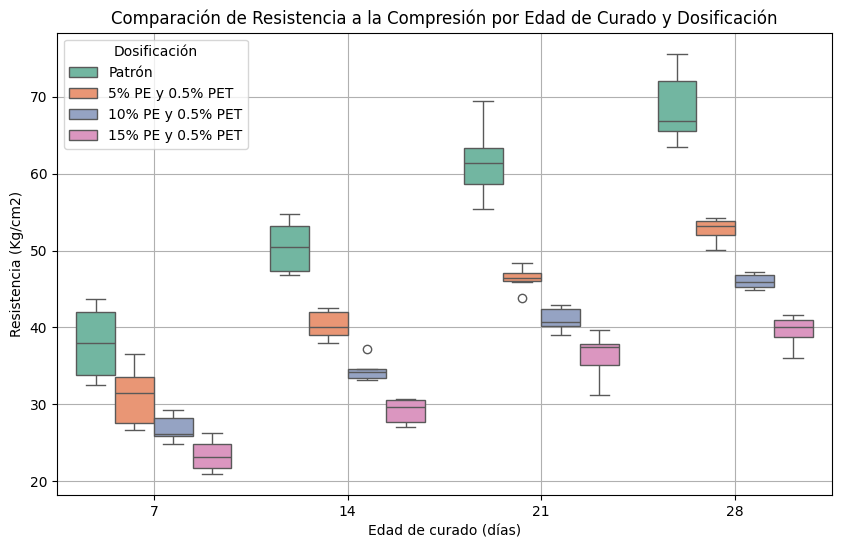

In [19]:
#Graficar Resultados

# Convertir los datos al formato adecuado para visualización
df_melted = df.melt(id_vars=['Dosificación', 'Edad de curado (días)'],
                    value_vars=['Bloque 1', 'Bloque 2', 'Bloque 3', 'Bloque 4', 'Bloque 5', 'Bloque 6'],
                    var_name='Bloque', value_name='Resistencia (Kg/cm2)')

# Asegurarse de que el nombre de la columna coincide exactamente
df_melted.columns = df_melted.columns.str.strip()

# Configuración del gráfico
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_melted['Edad de curado (días)'], y=df_melted['Resistencia (Kg/cm2)'], hue=df_melted['Dosificación'], palette="Set2")
plt.title('Comparación de Resistencia a la Compresión por Edad de Curado y Dosificación')
plt.grid(True)
plt.show()


In [ ]:
# Calcular los valores atípicos para cada dia y dosificación por separado
outliers_individuales = []

# Iterar sobre cada dimensión
Sefor edad in [7, 14, 21, 28]:
    df_actual = df[df['Edad de curado (días)'] == edad].melt(id_vars=["Dosificación", 'Edad de curado (días)'],
                                                                           value_vars=["Bloque 1", "Bloque 2", "Bloque 3", "Bloque 4", "Bloque 5", "Bloque 6"],
                                                                           var_name="Bloque", value_name="Variacion")

    # Iterar sobre cada dosificación
    for dosificacion in df_actual["Dosificación"].unique():
        df_dosif = df_actual[df_actual["Dosificación"] == dosificacion]

        # Calcular Q1 (percentil 25) y Q3 (percentil 75) por dosificación
        Q1 = df_dosif["Variacion"].quantile(0.25)
        Q3 = df_dosif["Variacion"].quantile(0.75)
        IQR = Q3 - Q1  # Rango intercuartil

        # Definir límites para valores atípicos
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Filtrar valores atípicos dentro de cada dosificación
        outliers_dosif = df_dosif[(df_dosif["Variacion"] < limite_inferior) | (df_dosif["Variacion"] > limite_superior)]

        # Guardar los resultados
        for _, row in outliers_dosif.iterrows():
            outliers_individuales.append([edad, dosificacion, row["Bloque"], row["Variacion"]])

# Convertir los valores atípicos en un DataFrame para visualización
df_outliers_individuales = pd.DataFrame(outliers_individuales, columns=["Dimensión", "Edad de curado (días)", "Bloque", "Valor Atípico"])

# Mostrar resultados
print("\n🔹 Valores Atípicos Identificados por Dosificación")
print("=" * 75)
print(df_outliers_individuales)


🔹 Valores Atípicos Identificados por Dosificación
   Dimensión Edad de curado (días)    Bloque  Valor Atípico
0         14     10% PE y 0.5% PET  Bloque 4      37.215475
1         21      5% PE y 0.5% PET  Bloque 4      43.857499
